In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from matplotlib import rc
rc('font', **{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

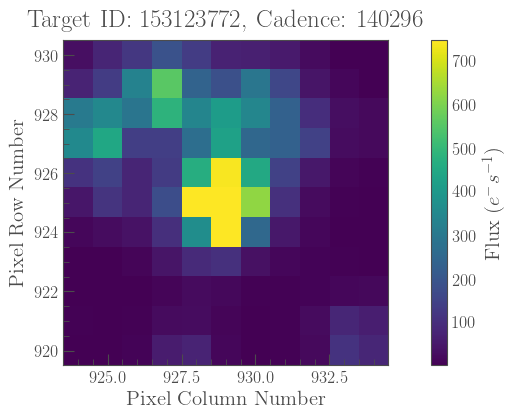

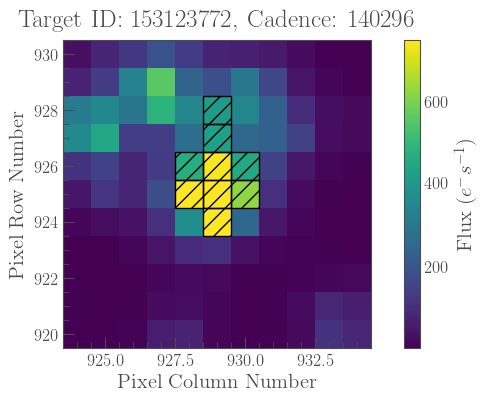

<Figure size 640x480 with 0 Axes>

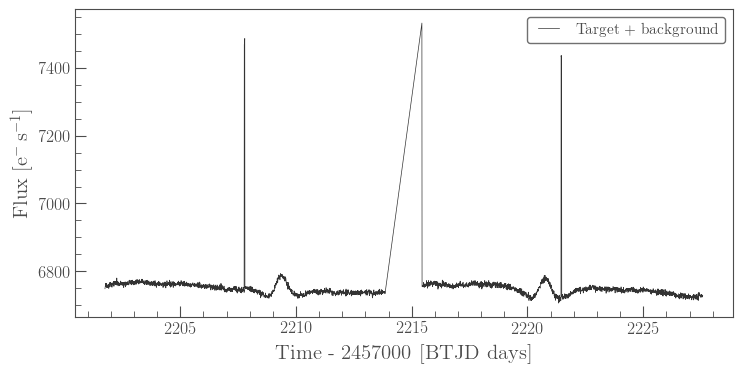

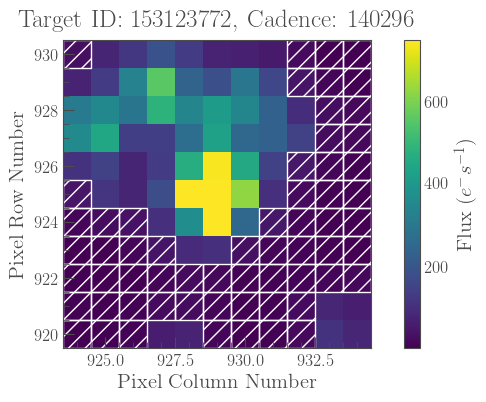

61

<Figure size 640x480 with 0 Axes>

In [2]:
## SECTOR 33
tpf = lk.search_targetpixelfile('TIC 153123772', mission="TESS").download_all(quality_bitmask=195, flux_column='sap_flux')

plt.cla()
plt.clf()
plt.figure(figsize=(8, 6))
tpf[2].plot()
fig=plt.gcf()
fig.tight_layout(pad=0.0)
fig.savefig("Sector33_WMask.jpg", dpi=200)

ns=2
target_mask = tpf[ns].create_threshold_mask(threshold=5.1, reference_pixel='center')

plt.show( tpf[ns].plot(aperture_mask=target_mask, mask_color='k') )
fig=plt.gcf()
fig.savefig("Sector33_AMask.jpg", dpi=200)


n_target_pixels = target_mask.sum()
n_target_pixels
target_lc = tpf[ns].to_lightcurve(aperture_mask=target_mask,) ## convert to light curve 
plt.show( target_lc.plot(label='Target + background') )# plot its light curve 
background_mask = ~tpf[ns].create_threshold_mask(threshold=0.001, reference_pixel=None)# estimating background
plt.show(tpf[ns].plot(aperture_mask=background_mask, mask_color='w') )
fig=plt.gcf()
fig.savefig("Sector33_BMask.jpg", dpi=200)

n_background_pixels = background_mask.sum()
n_background_pixels

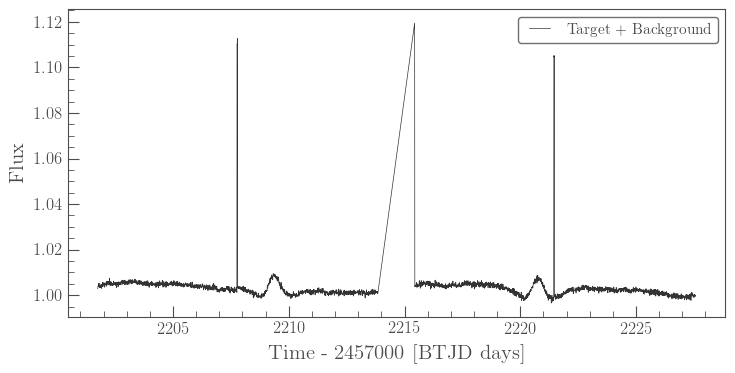

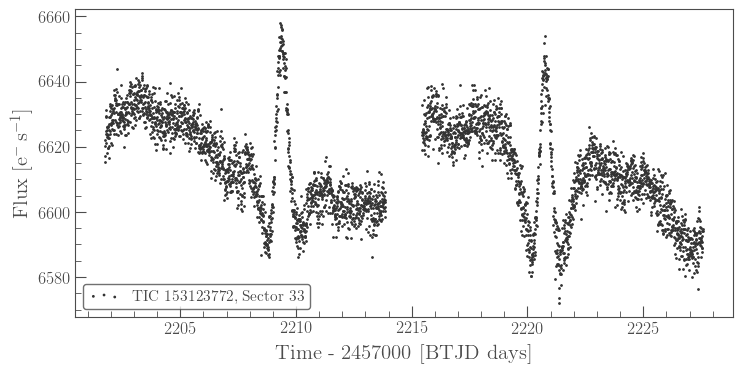

In [4]:
background_lc_per_pixel = tpf[ns].to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax =(target_lc / common_normalization).plot(normalize=False, label='Target + Background', markersize=4.0);
#(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
#                                                        ylabel='Normalized, shifted flux');
corrected_lc = target_lc - background_estimate_lc.flux
plt.show( corrected_lc.scatter(label='TIC 153123772, Sector 33') )
background_estimate_lc.flux

from astropy.io import ascii
ascii.write(corrected_lc['time',     'flux',     'flux_err'][:], 'Sector33SAPdata.dat', overwrite=True, format='no_header')  



In [ ]:
from astropy.io import ascii
period_days = 11.393423143561519 
epoch_time = 2209.361653386310
#corrected_lc=gaussian_filter(corrected_lc, 1.4)
plt.cla()
plt.clf()
plt.show( corrected_lc.scatter() )
ax = corrected_lc.flatten(85).scatter()##.scatter()   fold(period_days, epoch_time=epoch_time).
plt.show()
clc= corrected_lc.flatten(85)#.fold(period_days, epoch_time=epoch_time)
ascii.write(clc['time',     'flux',     'flux_err'][:], './Sector33data.dat', overwrite=True, format='no_header')  
print (len(clc['time']))
#ascii.write(clc, 'values_new.dat', overwrite=True)  